<h1> <center>  Police Shootings in the US - An Extrapolatory Data Analysis </h1> </center>


## Introduction

In 2015, [The Washington Post](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) began to log every fatal shooting by an on-duty police officer in the United States - including the race of the deceased, the circumstances of the shooting, whether the person was armed and whether the person was experiencing a mental-health crisis. This was done by culling local news reports, law enforcement websites and social media, and by monitoring independent databases such as Killed by Police and Fatal Encounters [$^1$](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

The Post is documenting only those shootings in which a police officer, in the line of duty, shoots and kills a civilian — the circumstances that most closely parallel the 2014 killing of Michael Brown in Ferguson, Mo., which began the protest movement culminating in Black Lives Matter and an increased focus on police accountability nationwide. The Post is not tracking deaths of people in police custody, fatal shootings by off-duty officers or non-shooting deaths [$^1$](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

The FBI and the Centers for Disease Control and Prevention log fatal shootings by police, but officials acknowledge that their data is incomplete. Since 2015, The Post has documented more than twice as many fatal shootings by police as recorded on average annually. The Post’s data relies primarily on news accounts, social media postings and police reports.
Analysis of years of data reveals that the number and circumstances of fatal shootings and the overall demographics of the victims have remained relatively constant [$^1$](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

## Data
- The data for this project has been collected by the [Washington Post](https://github.com/washingtonpost/data-police-shootings/blob/master/fatal-police-shootings-data.csv). Each record in the database corresponds to the death of a civillian due to fatal force by a police in the US. Some of the attributes present in the collected data are: State, Gender, Race, Age, Mental illness, Weapon, Body camera(Y/N), Fleeing the scene (Y/N), Year.
- Census data values - from US factfinder


## General Problem Statement
Perform an extrapolatory data analaysis on the data collected by the Washington Post

## Conclusions
- Black Americans are killed at a much higher rate than White Americans
- Most victims are young, male
- Police shootings have taken place in every state and have occurred more frequently in cities where populations are concentrated.


## Preprocessing

### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import requests

#For logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, metrics,model_selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#For plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Fetching and analysing data

In [3]:
df = pd.read_csv("fatal-police-shootings-data.csv", encoding="windows-1252")
df1 = pd.read_csv("fatal-police-shootings-data.csv", encoding="windows-1252")
print("data:\n\n",df.head())

data:

    id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleei

### Data Preprocessing

#### Analyzing distribution of null values

In [7]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      246
age                        156
gender                       4
race                       337
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       142
body_camera                  0
dtype: int64

#### Getting information on datatypes of fields

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 14 columns):
id                         4054 non-null int64
name                       4054 non-null object
date                       4054 non-null object
manner_of_death            4054 non-null object
armed                      3808 non-null object
age                        3898 non-null float64
gender                     4050 non-null object
race                       3717 non-null object
city                       4054 non-null object
state                      4054 non-null object
signs_of_mental_illness    4054 non-null bool
threat_level               4054 non-null object
flee                       3912 non-null object
body_camera                4054 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 388.1+ KB


#### Analyzing distribution of numeric fields

In [9]:
df.describe()

,id,age
count,4054.000000,3898.000000
mean,2269.788604,36.891483
std,1269.726799,13.125567
min,3.000000,6.000000
25%,1170.250000,27.000000
50%,2259.500000,35.000000
75%,3371.750000,45.000000
max,4465.000000,91.000000


There are no anomalies in the age field

#### Analyzing unique values in each column to decide on how to replace null and undetermined/other values

In [10]:
for col in df.columns[3:]:
    print (col,"\n",df[col].unique(),"\n\n")

manner_of_death 
 ['shot' 'shot and Tasered'] 


armed 
 ['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' nan 'shovel' 'hammer'
 'hatchet' 'undetermined' 'sword' 'machete' 'box cutter' 'metal object'
 'screwdriver' 'lawn mower blade' 'flagpole' 'guns and explosives'
 'cordless drill' 'crossbow' 'metal pole' 'Taser' 'metal pipe'
 'metal hand tool' 'blunt object' 'metal stick' 'sharp object'
 'meat cleaver' 'carjack' 'chain' "contractor's level" 'unknown weapon'
 'stapler' 'beer bottle' 'bean-bag gun' 'baseball bat and fireplace poker'
 'straight edge razor' 'gun and knife' 'ax' 'brick' 'baseball bat'
 'hand torch' 'chain saw' 'garden tool' 'scissors' 'pole' 'pick-axe'
 'flashlight' 'baton' 'spear' 'chair' 'pitchfork' 'hatchet and gun' 'rock'
 'piece of wood' 'bayonet' 'pipe' 'glass shard' 'motorcycle'
 'pepper spray' 'metal rake' 'crowbar' 'oar' 'machete and gun' 'tire iron'
 'air conditioner' 'pole and knife' 'baseball bat and bottle' 'fireworks'
 'pen' 'chainsaw' 'gun and sword' 'gun 

#### Imputing data for analysis purposes

In [11]:
# Manner of death
print("before:\t",df1['manner_of_death'].unique(),"\n")
mapping={
    'shot':1,
    'shot and Tasered':2
}
df1['manner_of_death']=df1['manner_of_death'].replace(mapping)
print("after:\t",df1['manner_of_death'].unique(),"\n")

before:	 ['shot' 'shot and Tasered'] 

after:	 [1 2] 



In [12]:
# Armed
print("before:\t",df1['armed'].unique(),"\n")
u=['unknown weapon','undetermined']
df1.loc[(df1['armed'].isna())] = 'unknown'
df1.loc[(df1['armed'] =='unknown weapon')|(df1['armed']=='undetermined'),'armed'] = 'unknown'



mapping = {
        'unarmed':0,
    
        'unknown' :-1,
        'hand torch':1,'pen':1,'carjack':1,"contractor's level":1,'stapler':1,'flashlight':1,
    
        'box cutter':2,'metal object':2,'toy weapon':2,'screwdriver':2,'blunt object':2,'piece of wood':2,
    
        'oar':3,'metal pole':3,'metal pipe':3,'metal stick':3,'hammer':3,'shovel':3,'pole':3,'metal hand tool':3,\
        'garden tool':3,'cordless drill':3,'rock':3,'bayonet':3,'pipe':3,'baton':3,'crowbar':3,'brick':3,\
        'baseball bat':3,'baseball bat and fireplace poker':3,'flagpole':3,'hatchet':4,'machete':4,'sword':4,\
        'straight edge razor':4,'chain':4,'ax':4,'spear':4,'pick-axe':4,'knife':4,'scissors':4,
        
        'meat cleaver':4,'lawn mower blade':4,'glass shard':4,'beer bottle':4,'sharp object':4,'baseball bat and bottle':4,
        'metal rake':4,'fireworks':4,'pole and knife':4,'pitchfork':4,'crossbow':4,'chain saw':4,'Taser':4,'tire iron':4,
    
        'bean-bag gun':5,'hatchet and gun':5,'gun':5,'nail gun':5,'vehicle':5,'motorcycle':5,'guns and explosives':5,'gun and knife':5,
        'machete and gun':5,'air conditioner':5
        }
df1['armed_level']=df1['armed'].replace(mapping)
print("after:\t",df1['armed_level'].unique(),"\n")

before:	 ['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' nan 'shovel' 'hammer'
 'hatchet' 'undetermined' 'sword' 'machete' 'box cutter' 'metal object'
 'screwdriver' 'lawn mower blade' 'flagpole' 'guns and explosives'
 'cordless drill' 'crossbow' 'metal pole' 'Taser' 'metal pipe'
 'metal hand tool' 'blunt object' 'metal stick' 'sharp object'
 'meat cleaver' 'carjack' 'chain' "contractor's level" 'unknown weapon'
 'stapler' 'beer bottle' 'bean-bag gun' 'baseball bat and fireplace poker'
 'straight edge razor' 'gun and knife' 'ax' 'brick' 'baseball bat'
 'hand torch' 'chain saw' 'garden tool' 'scissors' 'pole' 'pick-axe'
 'flashlight' 'baton' 'spear' 'chair' 'pitchfork' 'hatchet and gun' 'rock'
 'piece of wood' 'bayonet' 'pipe' 'glass shard' 'motorcycle'
 'pepper spray' 'metal rake' 'crowbar' 'oar' 'machete and gun' 'tire iron'
 'air conditioner' 'pole and knife' 'baseball bat and bottle' 'fireworks'
 'pen' 'chainsaw' 'gun and sword' 'gun and car' 'vehicle' 'pellet gun'
 'claimed to be 

In [13]:
# Gender
print("before:\t",df1['gender'].unique(),"\n")
df1['intgender']=df1['gender']=='M'
print("after:\t",df1['intgender'].unique(),"\n")

before:	 ['M' 'F' 'unknown' nan] 

after:	 [ True False] 



In [14]:
# Threat Level
print("before:\t",df1['threat_level'].unique(),"\n")
df1.loc[df1.threat_level != 'attack', 'threat_level'] = 'Other'
df1['threat_level']=df1['threat_level']=='attack'
df1['threat_level']=df1['threat_level'].astype(int)
print("before:\t",df1['threat_level'].unique(),"\n")

before:	 ['attack' 'other' 'unknown' 'undetermined'] 

before:	 [1 0] 



In [15]:
# Body camera
print("before:\t",df1['body_camera'].unique(),"\n")
df1['body_camera']=df1['body_camera'].fillna(False)

print("after:\t",df1['body_camera'].unique(),"\n")

before:	 [False True 'unknown'] 

after:	 [False True 'unknown'] 



In [16]:
# Flee
print("before:\t",df1['flee'].unique(),"\n")

df1['flee']=df1['flee'].fillna('Other')
mapping={
    'Car':2,
    'Foot':1,
    'Not fleeing':0,
    'Other':-1
}
df1['flee']=df1['flee'].replace(mapping)
print("after:\t",df1['flee'].unique(),"\n")

before:	 ['Not fleeing' 'Car' 'Foot' 'unknown' 'Other' nan] 

after:	 [0 2 1 'unknown' -1] 



In [17]:
df1.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,armed_level,intgender
0,3,Tim Elliot,2015-01-02,1,gun,53,M,A,Shelton,WA,True,1,0,False,5,True
1,4,Lewis Lee Lembke,2015-01-02,1,gun,47,M,W,Aloha,OR,False,1,0,False,5,True
2,5,John Paul Quintero,2015-01-03,2,unarmed,23,M,H,Wichita,KS,False,0,0,False,0,True
3,8,Matthew Hoffman,2015-01-04,1,toy weapon,32,M,W,San Francisco,CA,True,1,0,False,2,True
4,9,Michael Rodriguez,2015-01-04,1,nail gun,39,M,H,Evans,CO,False,1,0,False,5,True


In [18]:
df = df.rename(columns={"city": "City"})
df.drop(["id", "name", "manner_of_death"], axis=1, inplace=True)
df.age.fillna(value=df.age.mean(), inplace=True)
df.age = df.age.astype(int)

#As race plays an important role in the analysis, we drop rows where race is not entered
df.dropna(subset=["race"], inplace=True)

#It can be observed from the CSV, that there is quite a bit of information missing for deaths after 01/06/2017
#thus, we eliminate those rows
df.drop(df.index[2363:], inplace=True) 
df.columns

Index(['date', 'armed', 'age', 'gender', 'race', 'City', 'state',
       'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'],
      dtype='object')

### Bias detection

Text(0.5, 1.0, 'Age distribution')

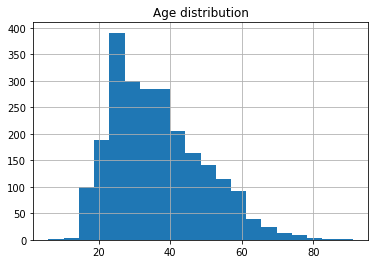

In [19]:
df.age.hist(bins=20)
plt.title("Age distribution")

From the above graph, we can see that the age distribution of victims is not exactly normally distributed but it tallies with the age distribution of the population of the country ( with majorty of the victims around the age of 25)

### Introducing a new column - total race population for analysis 

In [20]:
conditions = [df["race"]=="A", df["race"]=="W", df["race"]=="H", df["race"]=="B", df["race"]=="N", df["race"]=="O"]
race_total_population = [14674252, 223553265, 50477594, 38929319, 2932248, 22579629]

asian_pop=race_total_population[0]
white_pop=race_total_population[1]
hispanic_pop=race_total_population[2]
black_pop=race_total_population[3]
native_pop=race_total_population[4]
other_pop=race_total_population[5]

df["total_population"] = np.select(conditions, race_total_population, default="zero")

## Extrapolatory Data Analysis

In [22]:
#calculating total victims by race
black_total=df[(df.race=='B')].count()[0]
white_total=df[(df.race=='W')].count()[0]
native_total=df[(df.race=='N')].count()[0]
asian_total=df[(df.race=='A')].count()[0]
hispanic_total=df[(df.race=='H')].count()[0]
other_total=df[(df.race=='O')].count()[0]

#race_proportion
victims_race_proportions=[black_total/black_pop,white_total/white_pop,
                 native_total/native_pop,asian_total/asian_pop,
                 hispanic_total/hispanic_pop,other_total/other_pop]

#gender
female = df[df["gender"] == "F"].gender.count()
male = df[df["gender"] == "M"].gender.count()

#age
avg_age_w = df.age[(df["race"] == "W")].mean() 
avg_age_b = df.age[(df["race"] == "B")].mean() 
avg_age_h = df.age[(df["race"] == "H")].mean() 

#armed
armed = df.armed.value_counts(ascending=False)
df_armed = df.filter(["armed"], axis=1)
df_armed["count"] = 1
grouped_armed = df_armed.groupby("armed", as_index=False,sort=False).sum()
grouped_armed = grouped_armed.sort_values("count", ascending=False).head(8) 

#city
city = df.City.value_counts(ascending=False)
df_city = df.filter(["City"], axis=1)
df_city["count"] = 1
grouped_city = df_city.groupby("City", as_index=False,sort=False).sum()
grouped_city = grouped_city.sort_values("count", ascending=False).head(8)   

victims_race=[black_total,white_total,native_total,asian_total,hispanic_total,other_total]
victims_gender=[male,female]
racerows = df.loc[(df["race"] == "B") | (df["race"] == "W") | (df["race"] == "H") | (df["race"] == "A")|(df["race"]=='O')]
three_races = df.loc[(df["race"] == "B") | (df["race"] == "W") | (df["race"] == "H")]

races=['Black','White','Native','Asian','Hispanic','Other']
gender=['Male','Female']

### Total number of people killed, by race

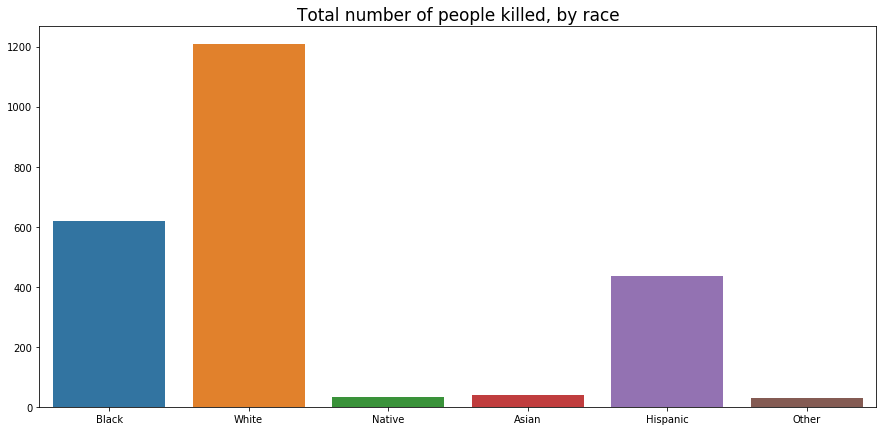

In [23]:
plt.figure(figsize=(15,7))
sns.barplot(y=victims_race,x=races)
plt.title("Total number of people killed, by race", fontsize=17)
plt.savefig('race.png')

From the bar chart above, it can be observed that majority of the victims are White. This makes sense since majority of the population in the US is White.

### Number of people killed as a proportion of respective races

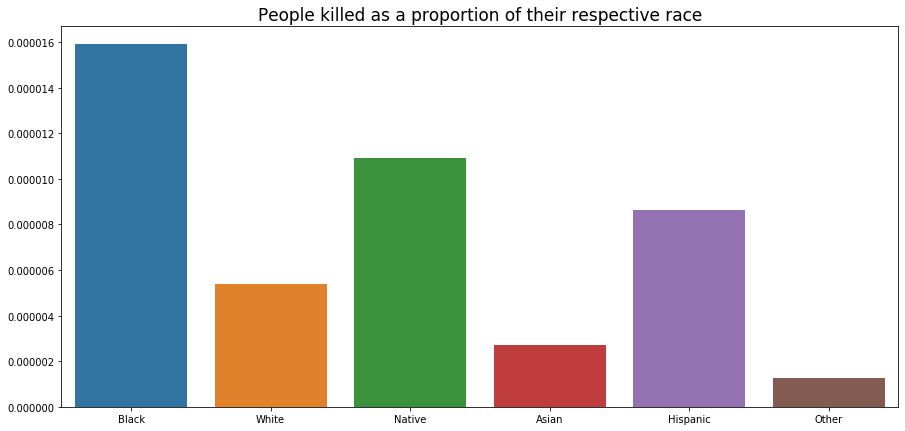

In [24]:
plt.figure(figsize=(15,7))
plt.title("People killed as a proportion of their respective race", fontsize=17)
sns.barplot(y=victims_race_proportions,x=races)
plt.savefig('race_proportion.png')

Earlier, we observed that the maximum victims where white. However, on looking at the numbers as a proportion of the racial population, Black people are more likely to be killed than white people.

### Total number of people killed, by gender

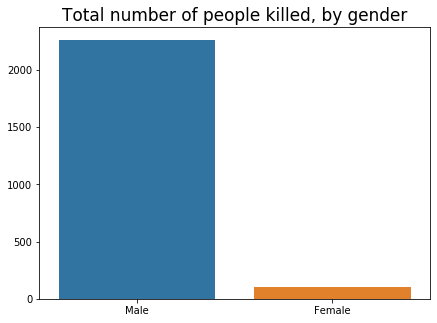

In [25]:
plt.figure(figsize=(7,5))
plt.title("Total number of people killed, by gender", fontsize=17)
sns.barplot(y=victims_gender,x=gender)

plt.savefig('gender.png')

### General age distribution of victims

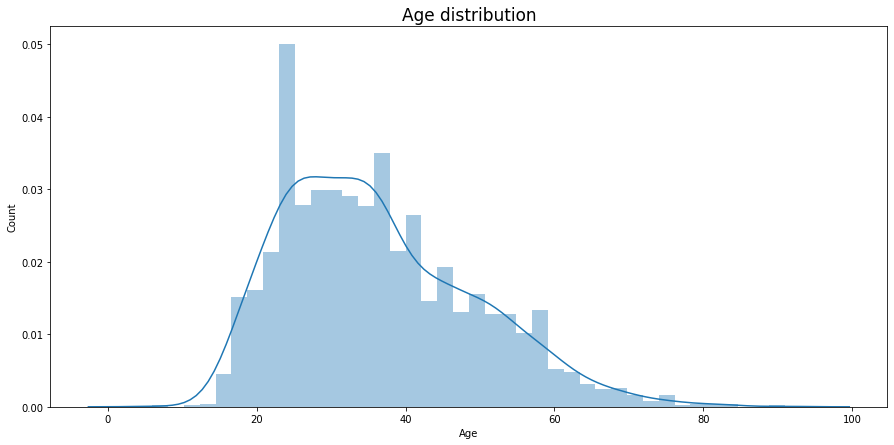

In [26]:
fig=plt.figure(figsize=(15,7))
plt.title("Age distribution", fontsize=17)

age_dist = sns.distplot(df["age"], bins=40)
age_dist.set(xlabel="Age", ylabel="Count")

plt.savefig('bias_detection.png')

### Comparing age distribution of victims by race

Text(0.5, 1, 'Age distribution of kills by race')

<Figure size 1080x504 with 0 Axes>

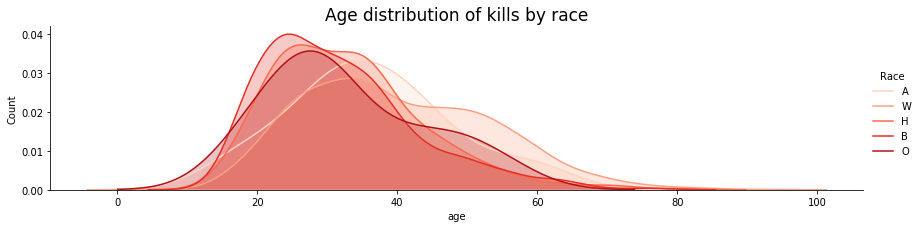

In [27]:
plt.figure(figsize=(15,7))
grid = sns.FacetGrid(data=racerows, hue="race", aspect=4,palette='Reds')
grid.map(sns.kdeplot, "age",shade=True)
grid.add_legend(title="Race")
grid.set_ylabels("Count")

plt.title("Age distribution of kills by race", fontsize=17)

### For better visualization

C:\Users\Aneri\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x504 with 0 Axes>

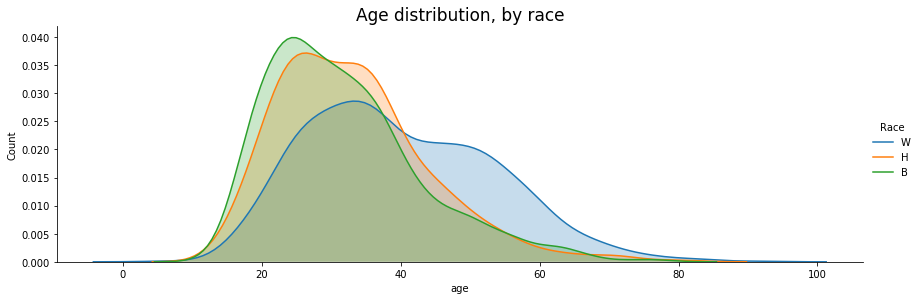

In [28]:
# Only for Blacks, Whites, Hispanics as it gets difficult to visualize for many races
fig=plt.figure(figsize=(15,7))
grid = sns.FacetGrid(data=three_races, hue="race", aspect=3, size=4)
grid.map(sns.kdeplot, "age", shade=True)
grid.add_legend(title="Race")
grid.set_ylabels("Count")

plt.title("Age distribution, by race", fontsize=17)
plt.savefig('age_race.png')

The age distribution of Blacks and Hispanics is skewed to the left. From this we observe that on average, Blacks and Hispanics are being killed at a younger age than Whites.

In [29]:
print ("Average age of white victims is " ,avg_age_w)
print ("Average age of black victims is ",avg_age_b)
print ("Average age of hispanic victims is ",avg_age_h)

Average age of white victims is  39.99917149958575
Average age of black victims is  31.694668820678515
Average age of hispanic victims is  33.06192660550459


From the above analysis, we can conclude that younger blacks are more likely to be victims than younger whites.

### Number of fatal shootings in each state

Text(0.5, 1.0, 'Number of police killings, by state')

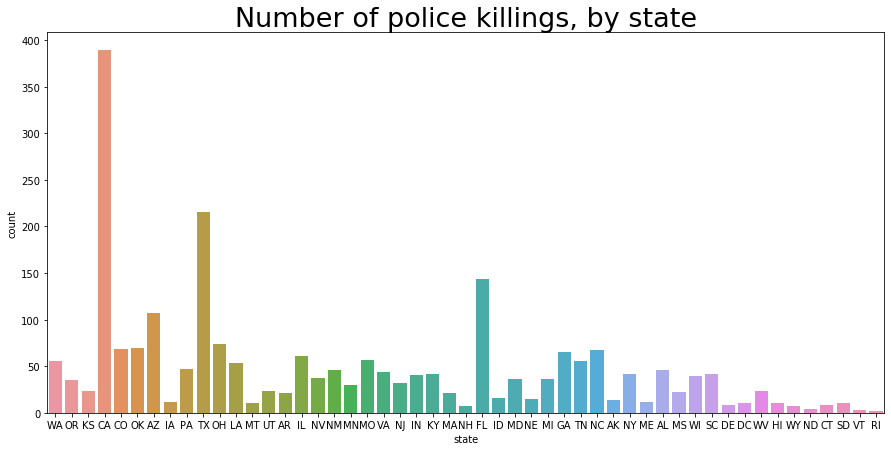

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x=df.state)
plt.title("Number of police killings, by state", fontsize=27)

California, Texas and Florida are the states in which police killings are most frequent. These are also the three most populous states in the US.

### Most dangerous cities

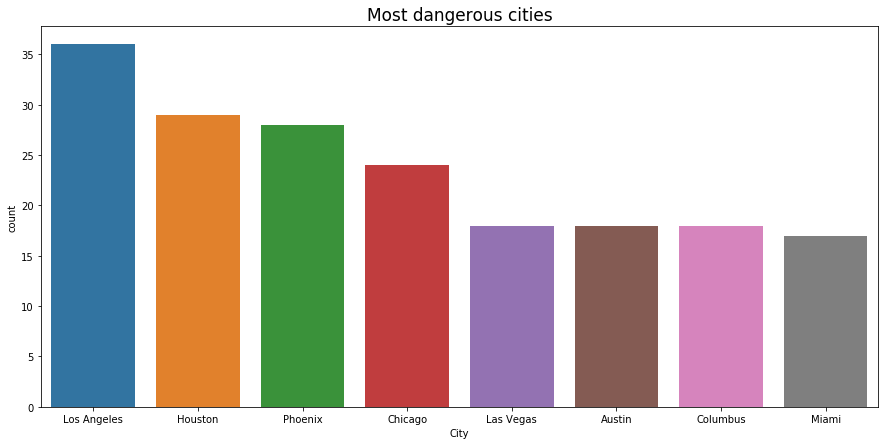

In [31]:
plt.figure(figsize=(15,7))
sns.barplot(data=grouped_city, x="City", y="count")
plt.title("Most dangerous cities", fontsize=17)
plt.savefig('cities_ranked.png')


### Most common ways of being armed

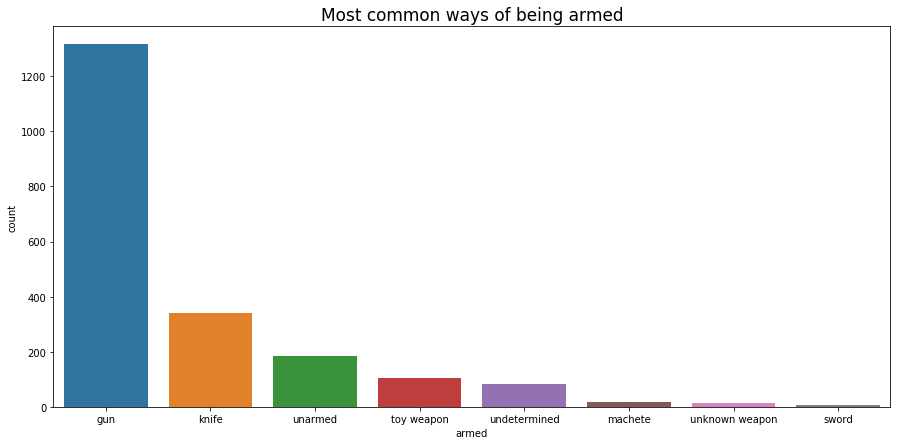

In [32]:
plt.figure(figsize=(15,7))
sns.barplot(data=grouped_armed, x="armed", y="count")
plt.title("Most common ways of being armed", fontsize=17)
plt.savefig('armed.png')

### Adding features (census data) - trying to explore whether it's possible to predict the race of a victim based on the features provided by census data

#### Preprocessing the census data

In [33]:
income = pd.read_csv("Data/Income.csv", encoding="windows-1252")
poverty = pd.read_csv("Data/Poverty.csv", encoding="windows-1252")
race = pd.read_csv("Data/Race.csv", encoding="windows-1252")
highschool = pd.read_csv("Data/Highschool.csv", encoding="windows-1252")

#data preprocessing - city
poverty["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
poverty["city"] = poverty["City"] + ", " + poverty["Geographic Area"]
poverty.drop(["Geographic Area", "City"], axis=1, inplace=True)
income["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
income["city"] = income["City"] + ", " + income["Geographic Area"]
income.drop(["Geographic Area", "City"], axis=1, inplace=True)
race["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True) 
race["city"] = race["City"] + ", " + race["Geographic area"]
race.drop(["Geographic area", "City"], axis=1, inplace=True)
highschool["City"].replace(["city", "CDP", "town"], "", regex=True, inplace=True)
highschool["city"] = highschool["City"] + ", " + highschool["Geographic Area"]
highschool.drop(["Geographic Area", "City"], axis=1, inplace=True)

df["city"] = df["City"] + " , " + df["state"] # Creating the same "city" format
merge1 = pd.merge(poverty, race, on="city", how="outer")
merge2 = pd.merge(merge1, income, on="city", how="outer")
merge3 = pd.merge(merge2, highschool, on="city", how="outer")
data = pd.merge(df, merge3, on="city", how="outer")
data.dropna(inplace=True)

data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].replace("(X)", np.NaN)
data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].replace("-", np.NaN)

data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]] = data[["Median Income", "poverty_rate", "share_white", "share_black", "share_native_american", "share_asian", 
      "share_hispanic", "percent_completed_hs"]].astype(float)

data.dropna(inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2512
Data columns (total 21 columns):
date                       1954 non-null object
armed                      1954 non-null object
age                        1954 non-null float64
gender                     1954 non-null object
race                       1954 non-null object
City                       1954 non-null object
state                      1954 non-null object
signs_of_mental_illness    1954 non-null object
threat_level               1954 non-null object
flee                       1954 non-null object
body_camera                1954 non-null object
total_population           1954 non-null object
city                       1954 non-null object
poverty_rate               1954 non-null float64
share_white                1954 non-null float64
share_black                1954 non-null float64
share_native_american      1954 non-null float64
share_asian                1954 non-null float64
share_hispanic         

In [35]:
data.describe()

,age,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Median Income,percent_completed_hs
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,36.054759,19.277840,66.845599,14.903275,2.205527,4.344985,20.923388,49094.342886,84.250154
std,12.477510,7.992977,20.587923,17.595603,10.047879,6.099220,20.646420,15481.388807,8.752191
min,6.000000,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,12083.000000,7.900000
25%,26.000000,13.700000,51.000000,2.100000,0.300000,1.000000,4.800000,39581.500000,80.600000
50%,35.000000,19.200000,68.900000,7.800000,0.600000,2.500000,12.900000,47012.000000,85.300000
75%,44.000000,23.700000,83.600000,21.800000,1.100000,5.100000,31.800000,54974.000000,89.500000
max,83.000000,76.400000,100.000000,98.000000,99.600000,60.700000,97.400000,175990.000000,100.000000


In [36]:
# Converting neccesary columns to floats
data["poverty_rate"] = data["poverty_rate"].astype(float)
data["share_white"] = data["share_white"].astype(float)
data["share_black"] = data["share_black"].astype(float)
data["share_native_american"] = data["share_native_american"].astype(float)
data["share_asian"] = data["share_asian"].astype(float)
data["share_hispanic"] = data["share_hispanic"].astype(float)
data["percent_completed_hs"] = data["percent_completed_hs"].astype(float)
data["Median Income"] = data["Median Income"].astype(int)

In [37]:
data.head()

,date,armed,age,gender,race,City,state,signs_of_mental_illness,threat_level,flee,...,total_population,city,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Median Income,percent_completed_hs
0,2015-01-02,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,...,14674252,"Shelton , WA",28.6,78.9,0.8,3.7,1.1,19.2,37072,80.1
1,2015-01-02,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,...,223553265,"Aloha , OR",14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1
2,2015-10-02,knife,55.0,F,W,Aloha,OR,True,other,Not fleeing,...,223553265,"Aloha , OR",14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1
3,2015-01-03,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,...,50477594,"Wichita , KS",17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5
5,2016-09-01,gun,18.0,M,W,Wichita,KS,False,other,Car,...,223553265,"Wichita , KS",17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2512
Data columns (total 21 columns):
date                       1954 non-null object
armed                      1954 non-null object
age                        1954 non-null float64
gender                     1954 non-null object
race                       1954 non-null object
City                       1954 non-null object
state                      1954 non-null object
signs_of_mental_illness    1954 non-null object
threat_level               1954 non-null object
flee                       1954 non-null object
body_camera                1954 non-null object
total_population           1954 non-null object
city                       1954 non-null object
poverty_rate               1954 non-null float64
share_white                1954 non-null float64
share_black                1954 non-null float64
share_native_american      1954 non-null float64
share_asian                1954 non-null float64
share_hispanic         

## Predicting the Race of a Victim using Logistic Regression

### Data Preprocessing

#### Transforming columns into dummy varaibles

In [35]:
dummies = pd.get_dummies(data[["armed", "gender", "city", "City", "state", "threat_level", "flee","signs_of_mental_illness", "body_camera"]], drop_first=True)
dummies = pd.concat([data, dummies], axis=1)

dummies.drop(data[["date", "armed", "gender", "city", "City", "state", "threat_level", "flee", "total_population","signs_of_mental_illness", "body_camera"]], axis=1, inplace=True)
dummies.dropna()
dummies.head()

,age,race,poverty_rate,share_white,share_black,share_native_american,share_asian,share_hispanic,Median Income,percent_completed_hs,...,state_WI,state_WV,state_WY,threat_level_other,threat_level_undetermined,flee_Foot,flee_Not fleeing,flee_Other,signs_of_mental_illness_True,body_camera_True
0,53.0,A,28.6,78.9,0.8,3.7,1.1,19.2,37072,80.1,...,0,0,0,0,0,0,1,0,1,0
1,47.0,W,14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1,...,0,0,0,0,0,0,1,0,0,0
2,55.0,W,14.9,70.9,2.6,1.0,8.9,21.1,65765,88.1,...,0,0,0,1,0,0,1,0,1,0
3,23.0,H,17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5,...,0,0,0,1,0,0,1,0,0,0
5,18.0,W,17.3,71.9,11.5,1.2,4.8,15.3,45947,87.5,...,0,0,0,1,0,0,0,0,0,1


#### Splitting the data into test and train sets

In [36]:
X = dummies.drop("race", axis=1)
y = dummies["race"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Fitting the training data

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions

In [38]:
predictions = logmodel.predict(X_test)
print (classification_report(y_test, predictions))

             precision    recall  f1-score   support

          A       0.00      0.00      0.00         8
          B       0.71      0.60      0.65       158
          H       0.61      0.48      0.54       119
          N       0.00      0.00      0.00         6
          O       0.50      0.25      0.33         4
          W       0.70      0.86      0.77       292

avg / total       0.67      0.69      0.67       587



C:\Users\Aneri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Accuracy score

In [39]:
score = accuracy_score(y_test, predictions)
print("logistic regression accuracy score for 6 race classes : ",round(score,4))

logistic regression accuracy score for 6 race classes :  0.6882
